# Shortest paths single case plotting

Data obtained using the A* algorithm

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

<IPython.core.display.Javascript object>

## Files and parameters

In [3]:
outdir = "out/"
plotdir = "plot/"
basefile = [
    "axis_uniform_critical2distance8paths1000",
    "axis_uniform_critical2distance16paths1000",
    "axis_uniform_critical2distance32paths1000",
    "axis_uniform_critical2distance64paths1000",
    "axis_uniform_critical32distance8paths1000",
    "axis_uniform_critical32distance16paths1000",
    "axis_uniform_critical32distance32paths1000",
    "axis_uniform_critical32distance64paths1000",
    "diag_uniform_critical2distance8paths1000",
    "diag_uniform_critical2distance16paths1000",
    "diag_uniform_critical2distance32paths1000",
    "diag_uniform_critical2distance64paths1000",
    "diag_uniform_critical8distance8paths1000",
    "diag_uniform_critical8distance16paths1000",
    "diag_uniform_critical8distance32paths1000",
    "diag_uniform_critical8distance64paths1000",
    "diag_uniform_critical32distance8paths1000",
    "diag_uniform_critical32distance16paths1000",
    "diag_uniform_critical32distance32paths1000",
    "diag_uniform_critical32distance64paths1000",
]
basefile = basefile[19]

<IPython.core.display.Javascript object>

In [4]:
params = pd.read_csv(outdir + basefile + "_params.csv", delimiter="\t")
critical_distance = params.at[0, "critical_distance"]
distance = params.at[0, "distance"]
length = 7 + distance
paths_count = params.at[0, "paths_count"]
with open(outdir + basefile + "_paths.csv") as paths_file:
    paths = list(
        csv.reader(
            filter(lambda row: row[0] != "#", paths_file),
            delimiter="\t",
            quotechar="'",
            quoting=csv.QUOTE_NONNUMERIC,
        )
    )
corr = pd.read_csv(outdir + basefile + "_overlaps.csv", header=None).to_numpy()

<IPython.core.display.Javascript object>

In [5]:
dissimilarity = 1 - corr
for i, row in enumerate(corr):
    for j, col in enumerate(row):
        if corr[j][i] != col:
            print(i, j, corr[j][i], col, corr[i][j])
hierarchy = sch.linkage(
    ssd.squareform(dissimilarity), method="complete", optimal_ordering=True
)
idx = sch.leaves_list(hierarchy)

<IPython.core.display.Javascript object>

## Plot

In [6]:
plt.style.use(["seaborn-paper", plotdir + ".mplstyle"])
set_matplotlib_formats("pdf", "svg")

paper_width = 8.27
width = 0.4 * paper_width
height = 2 * width / 5

<IPython.core.display.Javascript object>

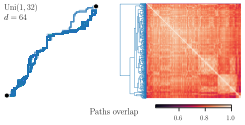

<IPython.core.display.Javascript object>

In [7]:
# Compute and plot dendrogram.
fig, axs = plt.subplots(
    1, 3, figsize=(width, height), gridspec_kw=dict(width_ratios=[2, 1, 2])
)
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=0, wspace=0)

sch.set_link_color_palette(
    [mpl.colors.rgb2hex(rgb[:3]) for rgb in mpl.cm.get_cmap("tab10").colors]
)

# Dendrogram
with plt.rc_context({"lines.linewidth": 0.4}):
    Z = sch.dendrogram(
        hierarchy,
        orientation="left",
        ax=axs[1],
        p=30,
        truncate_mode="none",
        color_threshold=0.7,
        above_threshold_color="gray",
    )
axs[1].set_xlim(1.05, 0)
axs[1].invert_yaxis()
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_frame_on(False)

# Plot distance matrix.
im = axs[2].matshow(corr[idx, :][:, idx], origin="upper", cmap="rocket")
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_frame_on(False)

# Plot bars
# axs[3].barh(np.flip(range(paths_count)), [paths[i+1][0] - min_val for i in idx], left=min_val, align='edge', height=1, color='gray')
# axs[3].set_ylim(0, paths_count)
# axs[3].set_xticks([])
# axs[3].set_yticks([])
# axs[3].set_frame_on(False)

# Paths
clusters = sch.fcluster(hierarchy, 0.7, criterion="distance")
color = sns.color_palette(n_colors=max(clusters))

# x = np.tile(np.arange(length), length)
# y = np.repeat(np.arange(length), length)
# axs[0].plot(x, y, color="gainsboro", linewidth=0, marker="+")

for i, branch in enumerate(paths[-1:0:-1]):
    axs[0].plot(
        np.array(branch[2:]) % length,
        np.array(branch[2:]) // length,
        color=color[clusters[-i - 1] - 1],
        alpha=0.2,
    )

axs[0].set_xlim(1, length - 2)
axs[0].set_ylim(1, length - 2)
axs[0].set_aspect("equal")
axs[0].set_frame_on(False)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

# Points
style = {
    "color": "black",
    "marker": "o",
    "markersize": 5,
    "markeredgecolor": "w",
}
axs[0].plot(paths[1][2] % length, paths[1][2] // length, **style)
axs[0].plot(paths[1][-1] % length, paths[1][-1] // length, **style)

# Legend
axs[0].text(
    0,
    1,
    fr"$\mathrm{{Uni}}(1,{critical_distance})$",
    transform=axs[0].transAxes,
    verticalalignment="top",
    fontsize=8.5,
)
axs[0].text(
    0,
    0.89,
    fr"$\\d={distance}$",
    transform=axs[0].transAxes,
    verticalalignment="top",
    fontsize=8.5,
)

# Global legend
# legend = fig.add_axes([0, -0.1, 2 / 5 - 0.08, 0.03])
# legend.text(
#     0,
#     -0.11,
#     fr"Distribution$(\mu,d_c)$ and distance $d$",
#     transform=legend.transAxes,
#     verticalalignment="top",
#     fontsize=9,
# )
# legend.set_frame_on(False)
# legend.set_xticks([])
# legend.set_yticks([])
# legend.set_xticklabels([])
# legend.set_yticklabels([])

# Colorbar
cax = fig.add_axes([3 / 5 + 0.04, -0.1, 2 / 5 - 0.08, 0.03])
plt.colorbar(im, cax=cax, orientation="horizontal")
cax.text(
    -0.15,
    -0.11,
    "Paths overlap",
    transform=cax.transAxes,
    horizontalalignment="right",
    verticalalignment="top",
    fontsize=9,
)

# Display and save figure.
fig.savefig(plotdir + basefile + "_overlaps.pdf", dpi=600)